In [91]:
!pip install scikeras
from google.colab import drive
drive.mount('/content/drive')



ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pyparsing/core.py", line 4891, in parseImpl
    return super().parseImpl(instring, loc, doActions)
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pyparsing/core.py", line 4790, in parseImpl
    loc, tokens = self_expr_parse(instring, loc, doActions)
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pyparsing/core.py", line 817, in _parseNoCache
    loc, tokens = self.parseImpl(instring, pre_loc, doActions)
  F

In [135]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

In [136]:
churn=pd.read_csv('/content/drive/My Drive/Colab Notebooks/CustomerChurn_dataset.csv')

In [137]:
churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [138]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [139]:
churn.drop('customerID',axis=1,inplace=True)

In [140]:
churn['SeniorCitizen']= churn['SeniorCitizen'].astype(str)

In [141]:
churn['TotalCharges']=churn['TotalCharges'].replace(' ', np.NaN)
churn['TotalCharges']=churn['TotalCharges'].astype(float)
churn['TotalCharges']=churn['TotalCharges'].fillna(churn['TotalCharges'].median())

In [142]:
churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [143]:
columns_to_encode = churn.select_dtypes(include=['object','float64']).columns
# Instantiate LabelEncoder
lE= LabelEncoder()
for column in columns_to_encode:
    churn[column] = lE.fit_transform(churn[column])







In [144]:
 churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            7043 non-null   int64
 1   SeniorCitizen     7043 non-null   int64
 2   Partner           7043 non-null   int64
 3   Dependents        7043 non-null   int64
 4   tenure            7043 non-null   int64
 5   PhoneService      7043 non-null   int64
 6   MultipleLines     7043 non-null   int64
 7   InternetService   7043 non-null   int64
 8   OnlineSecurity    7043 non-null   int64
 9   OnlineBackup      7043 non-null   int64
 10  DeviceProtection  7043 non-null   int64
 11  TechSupport       7043 non-null   int64
 12  StreamingTV       7043 non-null   int64
 13  StreamingMovies   7043 non-null   int64
 14  Contract          7043 non-null   int64
 15  PaperlessBilling  7043 non-null   int64
 16  PaymentMethod     7043 non-null   int64
 17  MonthlyCharges    7043 non-null  

In [145]:
 churn.corr()['Churn'].sort_values(ascending=False)

Churn               1.000000
PaperlessBilling    0.191825
MonthlyCharges      0.183523
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.230754
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

In [146]:
selected_columns = churn.corr()['Churn'][abs(churn.corr()['Churn']) > 0.19].index.tolist()
selected_columns_churn = churn[selected_columns]
selected_columns_churn

,tenure,OnlineSecurity,OnlineBackup,TechSupport,Contract,PaperlessBilling,TotalCharges,Churn
0,1,0,2,0,0,1,74,0
1,34,2,0,0,1,0,3625,0
2,2,2,2,0,0,1,536,1
3,45,2,0,2,1,0,3571,0
4,2,0,0,0,0,1,674,1
...,...,...,...,...,...,...,...,...
7038,24,2,0,2,1,1,3701,0
7039,72,0,2,0,1,1,6305,0
7040,11,2,0,0,0,1,1265,0
7041,4,0,0,0,0,1,1157,1


In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

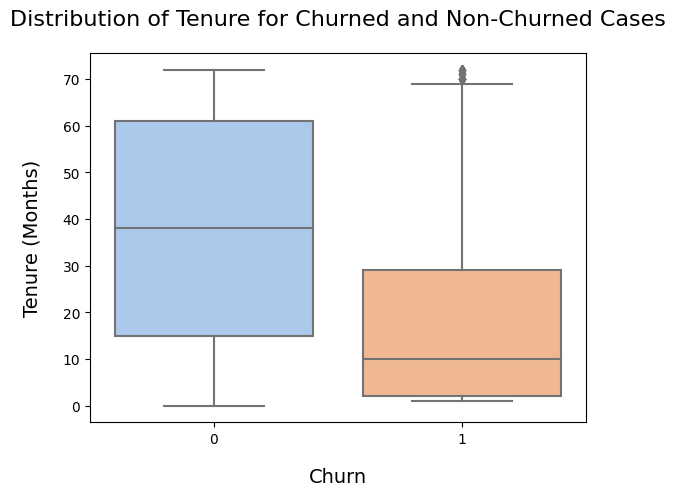

In [148]:
# Use Seaborn's boxplot for better visualization
sns.boxplot(x='Churn', y='tenure', data=churn, palette='pastel')

# Set plot labels and title with increased padding
plt.title('Distribution of Tenure for Churned and Non-Churned Cases', fontsize=16, pad=20)
plt.xlabel('Churn', fontsize=14, labelpad=15)
plt.ylabel('Tenure (Months)', fontsize=14, labelpad=15)

# Show the plot
plt.show()

this shows that, the longer you stay, the more committed you are to the company and the less likely you are to churn.

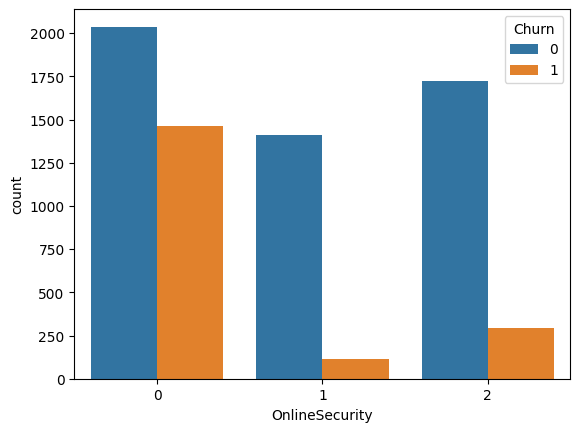

In [149]:
# Create a contingency table
contingency_table = pd.crosstab(selected_columns_churn['OnlineSecurity'], selected_columns_churn['Churn'])

# Plot the bar plot
sns.countplot(x='OnlineSecurity', hue='Churn', data=selected_columns_churn)
plt.show()


this demonstates that, when there is high online security, workers are not likely to churn and when there is low online security, workers are likely to churn.

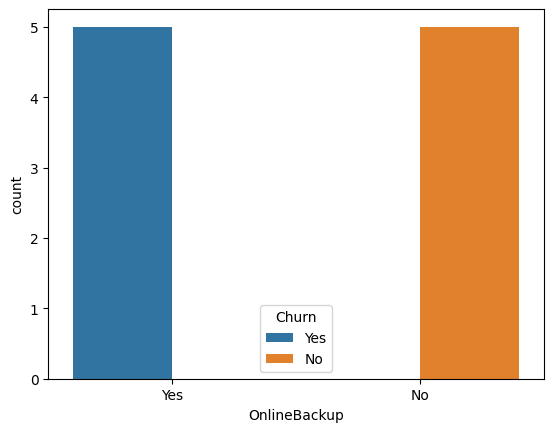

In [150]:

data = {'OnlineBackup': ['Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No'],
        'Churn': ['Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No']}
df = pd.DataFrame(data)

# Create a count plot to visualize the relationship
sns.countplot(x='OnlineBackup', hue='Churn', data=df)

# Show the plot
plt.show()


this shows that if the "Yes" bars are relatively shorter, it suggests that customers with online backup may be less likely to churn compared to those without

In [151]:
#from matplotlib import pyplot as plt
#Exploratory data analysis (EDA) selected_columns_churn
#selected_columns_churn.hist(bins=50, figsize=(20,15))
#plt.show()

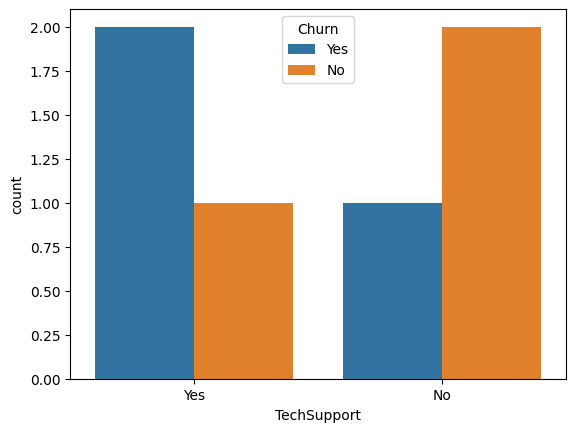

In [152]:
data = {'TechSupport': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
        'Churn': ['Yes', 'No', 'No', 'Yes', 'Yes', 'No']}
df = pd.DataFrame(data)
sns.countplot(x='TechSupport', hue='Churn', data=df)

plt.show()

By observing the graph, you can infer patterns such as whether customers with technical support ("Yes") are more or less likely to churn compared to those without technical support ("No").

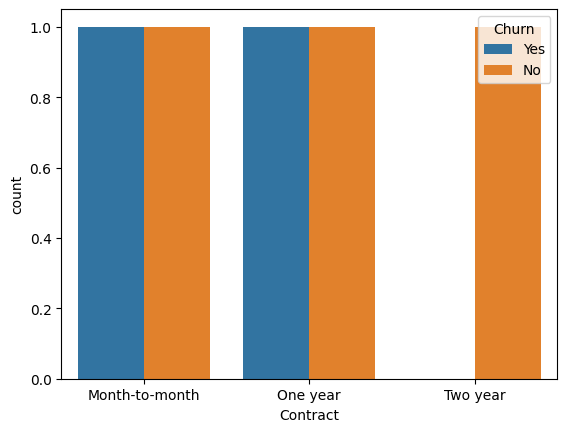

In [153]:
data = {'Contract': ['Month-to-month', 'One year', 'Two year', 'One year', 'Month-to-month'],
        'Churn': ['Yes', 'No', 'No', 'Yes', 'No']}
df = pd.DataFrame(data)

sns.countplot(x='Contract', hue='Churn', data=df)

plt.show()

it enables the identification of variations in churn likelihood across contracts.For instance, if the bars corresponding to "Month-to-month" contracts are predominantly higher in the "Churn: Yes" section, it implies that customers with month-to-month contracts exhibit a higher likelihood of churning compared to other contract types.

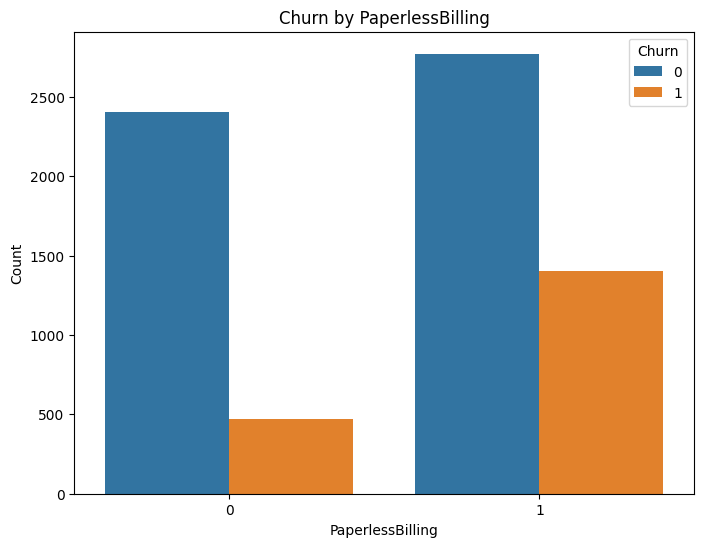

In [154]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PaperlessBilling', hue='Churn', data=selected_columns_churn)
plt.title('Churn by PaperlessBilling')
plt.xlabel('PaperlessBilling')
plt.ylabel('Count')
plt.show()

By observing the heights of the bars for each category of 'PaperlessBilling', you can visually compare the distribution of customers who have opted for paperless billing and those who have not, further differentiated by their churn status.

In [155]:
for i in selected_columns_churn.columns:
  print(selected_columns_churn[i])

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64
0       0
1       2
2       2
3       2
4       0
       ..
7038    2
7039    0
7040    2
7041    0
7042    2
Name: OnlineSecurity, Length: 7043, dtype: int64
0       2
1       0
2       2
3       0
4       0
       ..
7038    0
7039    2
7040    0
7041    0
7042    0
Name: OnlineBackup, Length: 7043, dtype: int64
0       0
1       0
2       0
3       2
4       0
       ..
7038    2
7039    0
7040    0
7041    0
7042    2
Name: TechSupport, Length: 7043, dtype: int64
0       0
1       1
2       0
3       1
4       0
       ..
7038    1
7039    1
7040    0
7041    0
7042    2
Name: Contract, Length: 7043, dtype: int64
0       1
1       0
2       1
3       0
4       1
       ..
7038    1
7039    1
7040    1
7041    1
7042    1
Name: PaperlessBilling, Length: 7043, dtype: int64
0         74
1       3625
2        536
3       3571


In [156]:
y = selected_columns_churn['Churn']
X = selected_columns_churn.drop('Churn', axis=1)

In [157]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# new DataFrame with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

selected_columns_churn = pd.concat([X_scaled_df, y], axis=1)

In [158]:
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [115]:
selected_columns_churn

,tenure,OnlineSecurity,OnlineBackup,TechSupport,Contract,PaperlessBilling,TotalCharges,Churn
0,-1.277445,-0.918838,1.242550,-0.925262,-0.828207,0.829798,-1.559291,0
1,0.066327,1.407321,-1.029919,-0.925262,0.371271,-1.205113,0.269671,0
2,-1.236724,1.407321,1.242550,-0.925262,-0.828207,0.829798,-1.321335,1
3,0.514251,1.407321,-1.029919,1.396299,0.371271,-1.205113,0.241858,0
4,-1.236724,-0.918838,-1.029919,-0.925262,-0.828207,0.829798,-1.250258,1
...,...,...,...,...,...,...,...,...
7038,-0.340876,1.407321,-1.029919,1.396299,0.371271,0.829798,0.308815,0
7039,1.613701,-0.918838,1.242550,-0.925262,0.371271,0.829798,1.650019,0
7040,-0.870241,1.407321,-1.029919,-0.925262,-0.828207,0.829798,-0.945860,0
7041,-1.155283,-0.918838,-1.029919,-0.925262,-0.828207,0.829798,-1.001486,1


In [116]:
selected_columns_churn.describe()

,tenure,OnlineSecurity,OnlineBackup,TechSupport,Contract,PaperlessBilling,TotalCharges,Churn
count,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7043.000000
mean,-2.421273e-17,6.809830e-17,2.295165e-17,-3.127478e-17,-7.566478e-17,-5.952296e-17,-1.160193e-17,0.265370
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,0.441561
min,-1.318165e+00,-9.188378e-01,-1.029919e+00,-9.252621e-01,-8.282069e-01,-1.205113e+00,-1.597405e+00,0.000000
25%,-9.516817e-01,-9.188378e-01,-1.029919e+00,-9.252621e-01,-8.282069e-01,-1.205113e+00,-8.853408e-01,0.000000
50%,-1.372744e-01,2.442417e-01,1.063153e-01,2.355183e-01,-8.282069e-01,8.297975e-01,-1.876014e-02,0.000000
75%,9.214551e-01,1.407321e+00,1.242550e+00,1.396299e+00,3.712710e-01,8.297975e-01,8.648174e-01,1.000000
max,1.613701e+00,1.407321e+00,1.242550e+00,1.396299e+00,1.570749e+00,8.297975e-01,1.765907e+00,1.000000


In [117]:
X

,tenure,OnlineSecurity,OnlineBackup,TechSupport,Contract,PaperlessBilling,TotalCharges
0,1,0,2,0,0,1,74
1,34,2,0,0,1,0,3625
2,2,2,2,0,0,1,536
3,45,2,0,2,1,0,3571
4,2,0,0,0,0,1,674
...,...,...,...,...,...,...,...
7038,24,2,0,2,1,1,3701
7039,72,0,2,0,1,1,6305
7040,11,2,0,0,0,1,1265
7041,4,0,0,0,0,1,1157


In [118]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [119]:
# Split the data into training and testing sets (if necessary)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
# Create a tree-based model (Random Forest in this example)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# RFECV object
rfecv = RFECV(estimator=model, step=1, cv=3, scoring='accuracy')

rfecv.fit(X_train, y_train)

# elected features
selected_columns_churn = X_train.columns[rfecv.support_]

In [121]:
optimal_num_features = rfecv.n_features_
support_mask = rfecv.support_
selected_columns_churn = X.columns[support_mask]
selected_columns_churn

Index(['tenure', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'Contract',
       'TotalCharges'],
      dtype='object')

In [122]:
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(32, activation='relu')(input_layer)
hidden_layer_2 = Dense(24, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(12, activation='relu')(hidden_layer_2)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

model = Model(inputs=input_layer, outputs=output_layer)

In [125]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/300
177/177 [==============================] - 3s 4ms/step - loss: 33.4736 - accuracy: 0.4815 - val_loss: 0.6482 - val_accuracy: 0.6941
Epoch 2/300
177/177 [==============================] - 1s 4ms/step - loss: 0.6485 - accuracy: 0.6818 - val_loss: 0.6370 - val_accuracy: 0.6977
Epoch 3/300
177/177 [==============================] - 1s 3ms/step - loss: 0.6473 - accuracy: 0.6889 - val_loss: 0.6513 - val_accuracy: 0.7324
Epoch 4/300
177/177 [==============================] - 1s 3ms/step - loss: 0.6260 - accuracy: 0.7031 - val_loss: 0.6123 - val_accuracy: 0.7310
Epoch 5/300
177/177 [==============================] - 1s 3ms/step - loss: 0.6177 - accuracy: 0.7126 - val_loss: 0.6669 - val_accuracy: 0.6089
Epoch 6/300
177/177 [==============================] - 1s 3ms/step - loss: 0.6142 - accuracy: 0.7148 - val_loss: 0.6017 - val_accuracy: 0.7346
Epoch 7/300
177/177 [==============================] - 1s 3ms/step - loss: 0.5994 - accuracy: 0.7309 - val_loss: 0.5742 - val_accuracy: 0.734

In [126]:
_, accuracy = model.evaluate(X_train, y_train)
accuracy*100

177/177 [==============================] - 1s 3ms/step - loss: 0.4776 - accuracy: 0.7528


75.27511715888977

In [127]:
# !pip install tensorflow

In [128]:
# !pip install keras==2.12.0

In [129]:
from sklearn.base import TransformerMixin, clone
from sklearn.exceptions import NotFittedError
from sklearn.preprocessing import FunctionTransformer


In [130]:
import tensorflow as tf
import scipy
import keras
#from tensorflow.keras.models import Model
from keras.layers import Dropout
import sklearn
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model using the Functional API
def build_model(units=64, activation='relu', dropout_rate=0.3):
    # Define input layer
    inputs = Input(shape=(X_train_scaled.shape[1],))

    # Add a hidden layer with dropout
    x = Dense(units, activation=activation)(inputs)
    x = Dropout(rate=dropout_rate)(x)

    # Output layer
    outputs = Dense(1, activation='sigmoid')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create a KerasClassifier for compatibility with scikit-learn
keras_classifier = KerasClassifier(build_fn=build_model, epochs=5, batch_size=32, activation='relu',verbose=0,units=32)

# Define hyperparameters to search
param_grid = {
    'units': [32, 64, 128],
    'activation': ['relu', 'tanh'],
    #'dropout_rate': [0.2, 0.3, 0.4]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=keras_classifier, param_grid=param_grid, cv=3, scoring='accuracy',verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the best model on the entire training set
best_model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, verbose=0)

# Evaluate the best model on the test set
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 0]  # Extract probabilities for the positive class
y_pred = (y_pred_proba > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"Test Accuracy: {accuracy}")
print(f"AUC Score: {auc_score}")

# Display the best parameters
print("Best Hyperparameters:")
print(best_params)



Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

Test Accuracy: 0.2100780695528744
AUC Score: 0.15619468568530231
Best Hyperparameters:
{'activation': 'relu', 'units': 32}


In [134]:
best_params = grid_search.best_params_
best_model = build_model()
best_model.save('best_model.h5')

In [159]:
X_train.columns


Index(['tenure', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'Contract',
       'PaperlessBilling', 'TotalCharges'],
      dtype='object')

In [ ]:
from pickle import dump,load
import pickle
with open('/content/drive/My Drive/Colab Notebooks/churnmodel.pkl', 'wb') as file:
  pickle.dump(best_model,file)